_Lambda School Data Science — Tree Ensembles_ 

# Decision Trees

### Links
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [How a Russian mathematician constructed a decision tree - by hand - to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._

### Libraries to install

#### graphviz (to visualize trees)
Anaconda:  
```conda install python-graphviz```

Google Colab:  
```!pip install graphviz
!apt-get install graphviz
```

#### ipywidgets (optional, for interactive widgets)
Anaconda: Already installed
Google Colab: [Doesn't work](https://github.com/googlecolab/colabtools/issues/60#issuecomment-462529981)

#### mlxtend (to plot decision regions)
[mlxtend.plotting.plot_decision_regions](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/): `pip install mlxtend`

In [7]:
!pip install graphviz 
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


### Imports and helper functions

In [0]:
%matplotlib inline
import graphviz
from IPython.display import display
from ipywidgets import interact
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz


def viztree(decision_tree, feature_names):
    """Visualize a decision tree"""
    dot_data = export_graphviz(decision_tree, out_file=None, feature_names=feature_names, 
                               filled=True, rounded=True)   
    return graphviz.Source(dot_data)


def viz3D(fitted_model, df, feature1, feature2, target='', num=100):
    """
    Visualize model predictions in 3D, for regression or binary classification
    
    Parameters
    ----------
    fitted_model : scikit-learn model, already fitted
    df : pandas dataframe, which was used to fit model
    feature1 : string, name of feature 1
    feature2 : string, name of feature 2
    target : string, name of target
    num : int, number of grid points for each feature
    
    References
    ----------
    https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
    https://scikit-learn.org/stable/auto_examples/tree/plot_iris.html  
    """
    x1 = np.linspace(df[feature1].min(), df[feature1].max(), num)
    x2 = np.linspace(df[feature2].min(), df[feature2].max(), num)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.c_[X1.flatten(), X2.flatten()]
    if hasattr(fitted_model, 'predict_proba'):
        predicted = fitted_model.predict_proba(X)[:,1]
    else:
        predicted = fitted_model.predict(X)
    Z = predicted.reshape(num, num)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X1, X2, Z, cmap='viridis')
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(target)
    return fig

# Golf Putts (1 feature, non-linear)

https://statmodeling.stat.columbia.edu/2008/12/04/the_golf_puttin/

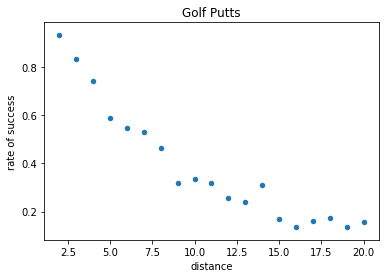

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

columns = ['distance', 'tries', 'successes']
data = [[2, 1443, 1346],
        [3, 694, 577],
        [4, 455, 337],
        [5, 353, 208],
        [6, 272, 149],
        [7, 256, 136],
        [8, 240, 111],
        [9, 217, 69],
        [10, 200, 67],
        [11, 237, 75],
        [12, 202, 52],
        [13, 192, 46],
        [14, 174, 54],
        [15, 167, 28],
        [16, 201, 27],
        [17, 195, 31],
        [18, 191, 33],
        [19, 147, 20],
        [20, 152, 24]]

putts = pd.DataFrame(columns=columns, data=data)
putts['rate of success'] = putts['successes'] / putts['tries']
putts.plot('distance', 'rate of success', kind='scatter', title='Golf Putts');

### OLS Regression

R^2 Score 0.8695850610243295


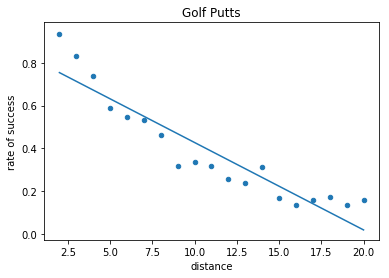

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

putts_X = putts[['distance']]
putts_y = putts['rate of success']
lr = LinearRegression()
lr.fit(putts_X, putts_y)
print('R^2 Score', lr.score(putts_X, putts_y))
ax = putts.plot('distance', 'rate of success', kind='scatter', title='Golf Putts')
ax.plot(putts_X, lr.predict(putts_X));

### Decision Tree

R^2 Score 0.9676848646593702


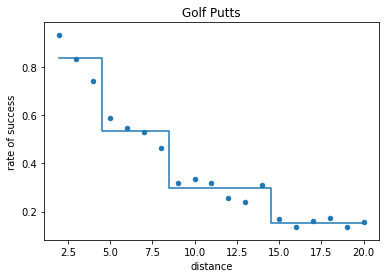

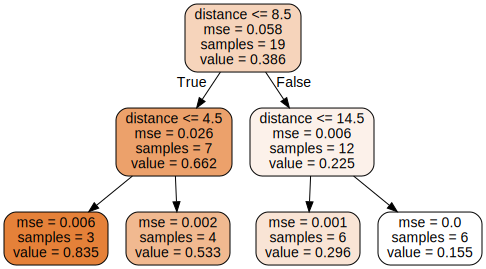

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

def viztree(decision_tree, feature_names):
    dot_data = export_graphviz(decision_tree, out_file=None, feature_names=feature_names, 
                               filled=True, rounded=True)   
    return graphviz.Source(dot_data)

def putts_tree(max_depth=1):
    tree = DecisionTreeRegressor(max_depth=max_depth)
    tree.fit(putts_X, putts_y)
    print('R^2 Score', tree.score(putts_X, putts_y))
    ax = putts.plot('distance', 'rate of success', kind='scatter', title='Golf Putts')
    ax.step(putts_X, tree.predict(putts_X), where='mid')
    plt.show()
    display(viztree(tree, feature_names=['distance']))

#interact(putts_tree, max_depth=(1,6,1));
putts_tree(max_depth=2)

R^2 Score 0.9676848646593703


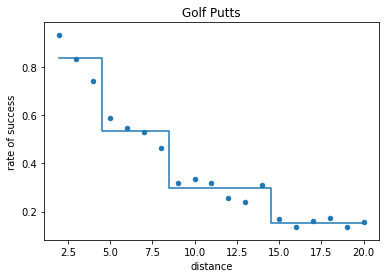

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

predictions = []
for distance in putts['distance']:
    samples = putts.copy()
    if distance <= 8.5:
        samples = samples.query('distance <= 8.5')
        if distance <= 4.5:
            samples = samples.query('distance <= 4.5')
        else:
            samples = samples.query('distance > 4.5')
    else:
        samples = samples.query('distance > 8.5')
        if distance <= 14.5:
            samples = samples.query('distance <= 14.5')
        else:
            samples = samples.query('distance > 14.5')
    prediction = samples['rate of success'].mean()
    predictions.append(prediction)
    
print('R^2 Score', r2_score(putts_y, predictions))
ax = putts.plot('distance', 'rate of success', kind='scatter', title='Golf Putts')
ax.step(putts_X, predictions, where='mid');

# Wave (1 feature, non-monotonic, train/test split)

Train R^2 score: 0.947865860886581
Test R^2 score: 0.7152979344422508


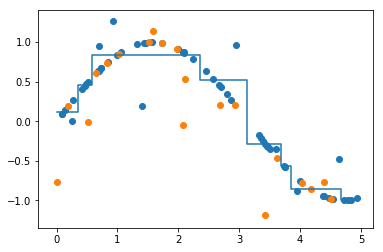

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

# Based on http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
def make_data():
    import numpy as np
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += 2 * (0.5 - rng.rand(16))
    return X, y

wave_X, wave_y = make_data()
wave_X_train, wave_X_test, wave_y_train, wave_y_test = train_test_split(
    wave_X, wave_y, test_size=0.25, random_state=42)

def regress_wave(max_depth=1):
    tree = DecisionTreeRegressor(max_depth=max_depth)
    tree.fit(wave_X_train, wave_y_train)
    print('Train R^2 score:', tree.score(wave_X_train, wave_y_train))
    print('Test R^2 score:', tree.score(wave_X_test, wave_y_test))
    plt.scatter(wave_X_train, wave_y_train)
    plt.scatter(wave_X_test, wave_y_test)
    plt.step(wave_X, tree.predict(wave_X), where='mid')
    plt.show()
    
regress_wave(max_depth=3)

# Simple housing (2 features)

https://christophm.github.io/interpretable-ml-book/interaction.html#feature-interaction

In [49]:
columns = ['Price', 'Good Location', 'Big Size']

data = [[300000, 1, 1], 
        [200000, 1, 0], 
        [250000, 0, 1], 
        [150000, 0, 0]]

house = pd.DataFrame(columns=columns, data=data)
house

,Price,Good Location,Big Size
0,300000,1,1
1,200000,1,0
2,250000,0,1
3,150000,0,0


### OLS Regression

In [50]:
house_X = house.drop(columns='Price')
house_y = house['Price']
lr = LinearRegression()
lr.fit(house_X, house_y)
print('R^2', lr.score(house_X, house_y))
print('Intercept \t', lr.intercept_)
coefficients = pd.Series(lr.coef_, house_X.columns)
print(coefficients.to_string())

R^2 1.0
Intercept 	 150000.0
Good Location     50000.0
Big Size         100000.0


In [52]:
%matplotlib notebook
import matplotlib.pyplot as plt
viz3D(lr, house, feature1='Good Location', feature2='Big Size', target='Price');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Decision Tree

In [53]:
tree = DecisionTreeRegressor()
tree.fit(house_X, house_y)
print('R^2', tree.score(house_X, house_y))

R^2 1.0


In [54]:
%matplotlib notebook
import matplotlib.pyplot as plt
viz3D(tree, house, feature1='Good Location', feature2='Big Size', target='Price');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
plt.figure()
table = house.pivot_table('Price', 'Good Location', 'Big Size')
sns.heatmap(table, annot=True, fmt='d', cmap='viridis');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Simple housing, with a twist (feature interactions, 2 features)

In [59]:
house.loc[0, 'Price'] = 400000
house_X = house.drop(columns='Price')
house_y = house['Price']
house

,Price,Good Location,Big Size
0,400000,1,1
1,200000,1,0
2,250000,0,1
3,150000,0,0


### OLS Regression, without engineering an interaction term

In [60]:
lr = LinearRegression()
lr.fit(house_X, house_y)
print('R^2', lr.score(house_X, house_y))
print('Intercept \t', lr.intercept_)
coefficients = pd.Series(lr.coef_, house_X.columns)
print(coefficients.to_string())

R^2 0.9285714285714286
Intercept 	 125000.0
Good Location    100000.0
Big Size         150000.0


### Decision Tree, without engineering an interaction term

In [61]:
tree = DecisionTreeRegressor()
tree.fit(house_X, house_y)
print('R^2', tree.score(house_X, house_y))

R^2 1.0


### OLS Regression, with engineered interaction term

In [62]:
house['Good Location * Big Size'] = house['Good Location'] * house['Big Size']
house_X = house.drop(columns='Price')
house_y = house['Price']
house

,Price,Good Location,Big Size,Good Location * Big Size
0,400000,1,1,1
1,200000,1,0,0
2,250000,0,1,0
3,150000,0,0,0


In [63]:
lr = LinearRegression()
lr.fit(house_X, house_y)
print('R^2', lr.score(house_X, house_y))
print('Intercept \t', lr.intercept_)
coefficients = pd.Series(lr.coef_, house_X.columns)
print(coefficients.to_string())

R^2 1.0
Intercept 	 150000.0
Good Location                50000.0
Big Size                    100000.0
Good Location * Big Size    100000.0


### Decision Tree, with engineered interaction term

In [64]:
tree = DecisionTreeRegressor()
tree.fit(house_X, house_y)
print('R^2', tree.score(house_X, house_y))

R^2 1.0


# Titanic (classification, interactions, non-linear / non-monotonic)

In [0]:
titanic = sns.load_dataset('titanic')
titanic['sex'] = (titanic['sex'] == 'female').astype(int)

In [73]:
imputer = SimpleImputer()
titanic_X = imputer.fit_transform(titanic[['age', 'sex']])
titanic_y = titanic['survived']
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(titanic_X, titanic_y)
print('Accuracy', tree.score(titanic_X, titanic_y))

%matplotlib notebook
import matplotlib.pyplot as plt
viz3D(tree, titanic, feature1='age', feature2='sex', target='survived');

Accuracy 0.8047138047138047


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(titanic_X, titanic_y)
print('Accuracy', tree.score(titanic_X, titanic_y))

%matplotlib notebook
import matplotlib.pyplot as plt
viz3D(logistic, titanic, feature1='age', feature2='sex', target='survived');

Accuracy 0.8047138047138047


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>